# `SC1015 DATA SCIENCE & ARTIFICIAL INTELLIGENCE MINI-PROJECT` 

### THE DIAGNOSIS OF BREAST CANCER AS A DATA-DRIVEN PROBLEM

Welcome to our humble project! Having formulated the diagnosis of breast cancer as a data-driven problem, we will utilize machine learning concepts to predict if breast cancer is benign or malignant. Along the way, markdowns have been added to aid in your reading and understanding of our project. Have fun!

In [1]:
# import libraries
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway



sb.set()

# `Breast Cancer Wisconsin (Diagnostic) Data Set`

This dataset is obtained from Kaggle. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

For an overview of the columns, please kindly refer to `data_description.txt` for more information.

<img src="images/dataset-cover.jpeg" width="1000" height="400">

In [2]:
#read dataset
breastCancerdf = pd.read_csv('breastCancer.csv')


breastCancerdf

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
breastCancerdf.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### `Drop unneeded column`

This column has inconsistent data formatting and serves no purpose for our project.

In [4]:
breastCancerdf.drop(columns='Unnamed: 32')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### `Choosing between 3 sets of predictors`

The 30 predictor columns are split into 3 rather identical sets of 10 columns.
These 3 sets are labelled 'mean', 'standard', and 'worst'. 

We decided to choose the 'mean' set for this project as we feel it might best represent the 'average case'. Thus, we extract only the 10 predictor columns under the 'mean' category.

In [5]:
breastCancerdf_mean = breastCancerdf.iloc[:, :12]

breastCancerdf_mean.dropna(inplace=True)

# X = breastCancerdf.iloc[:, 2:12]
# y = breastCancerdf.diagnosis
breastCancerdf_mean



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


# `Exploratory Data Analysis`

Here, we wish to gain a better understanding of the dataset through EDA. We will also perform Data Cleaning and Feature Selection to obtain the best 5 predictive features to be used in our Machine Learning models later on.

## `Data Visualisation`

Before we perform data cleaning, let us visualise the dataset to gain a better understanding of what we are working with.

To start things off, a boxplot would allow us to immediately gain a brief insight into the distribution of points and outliers of the dataset.

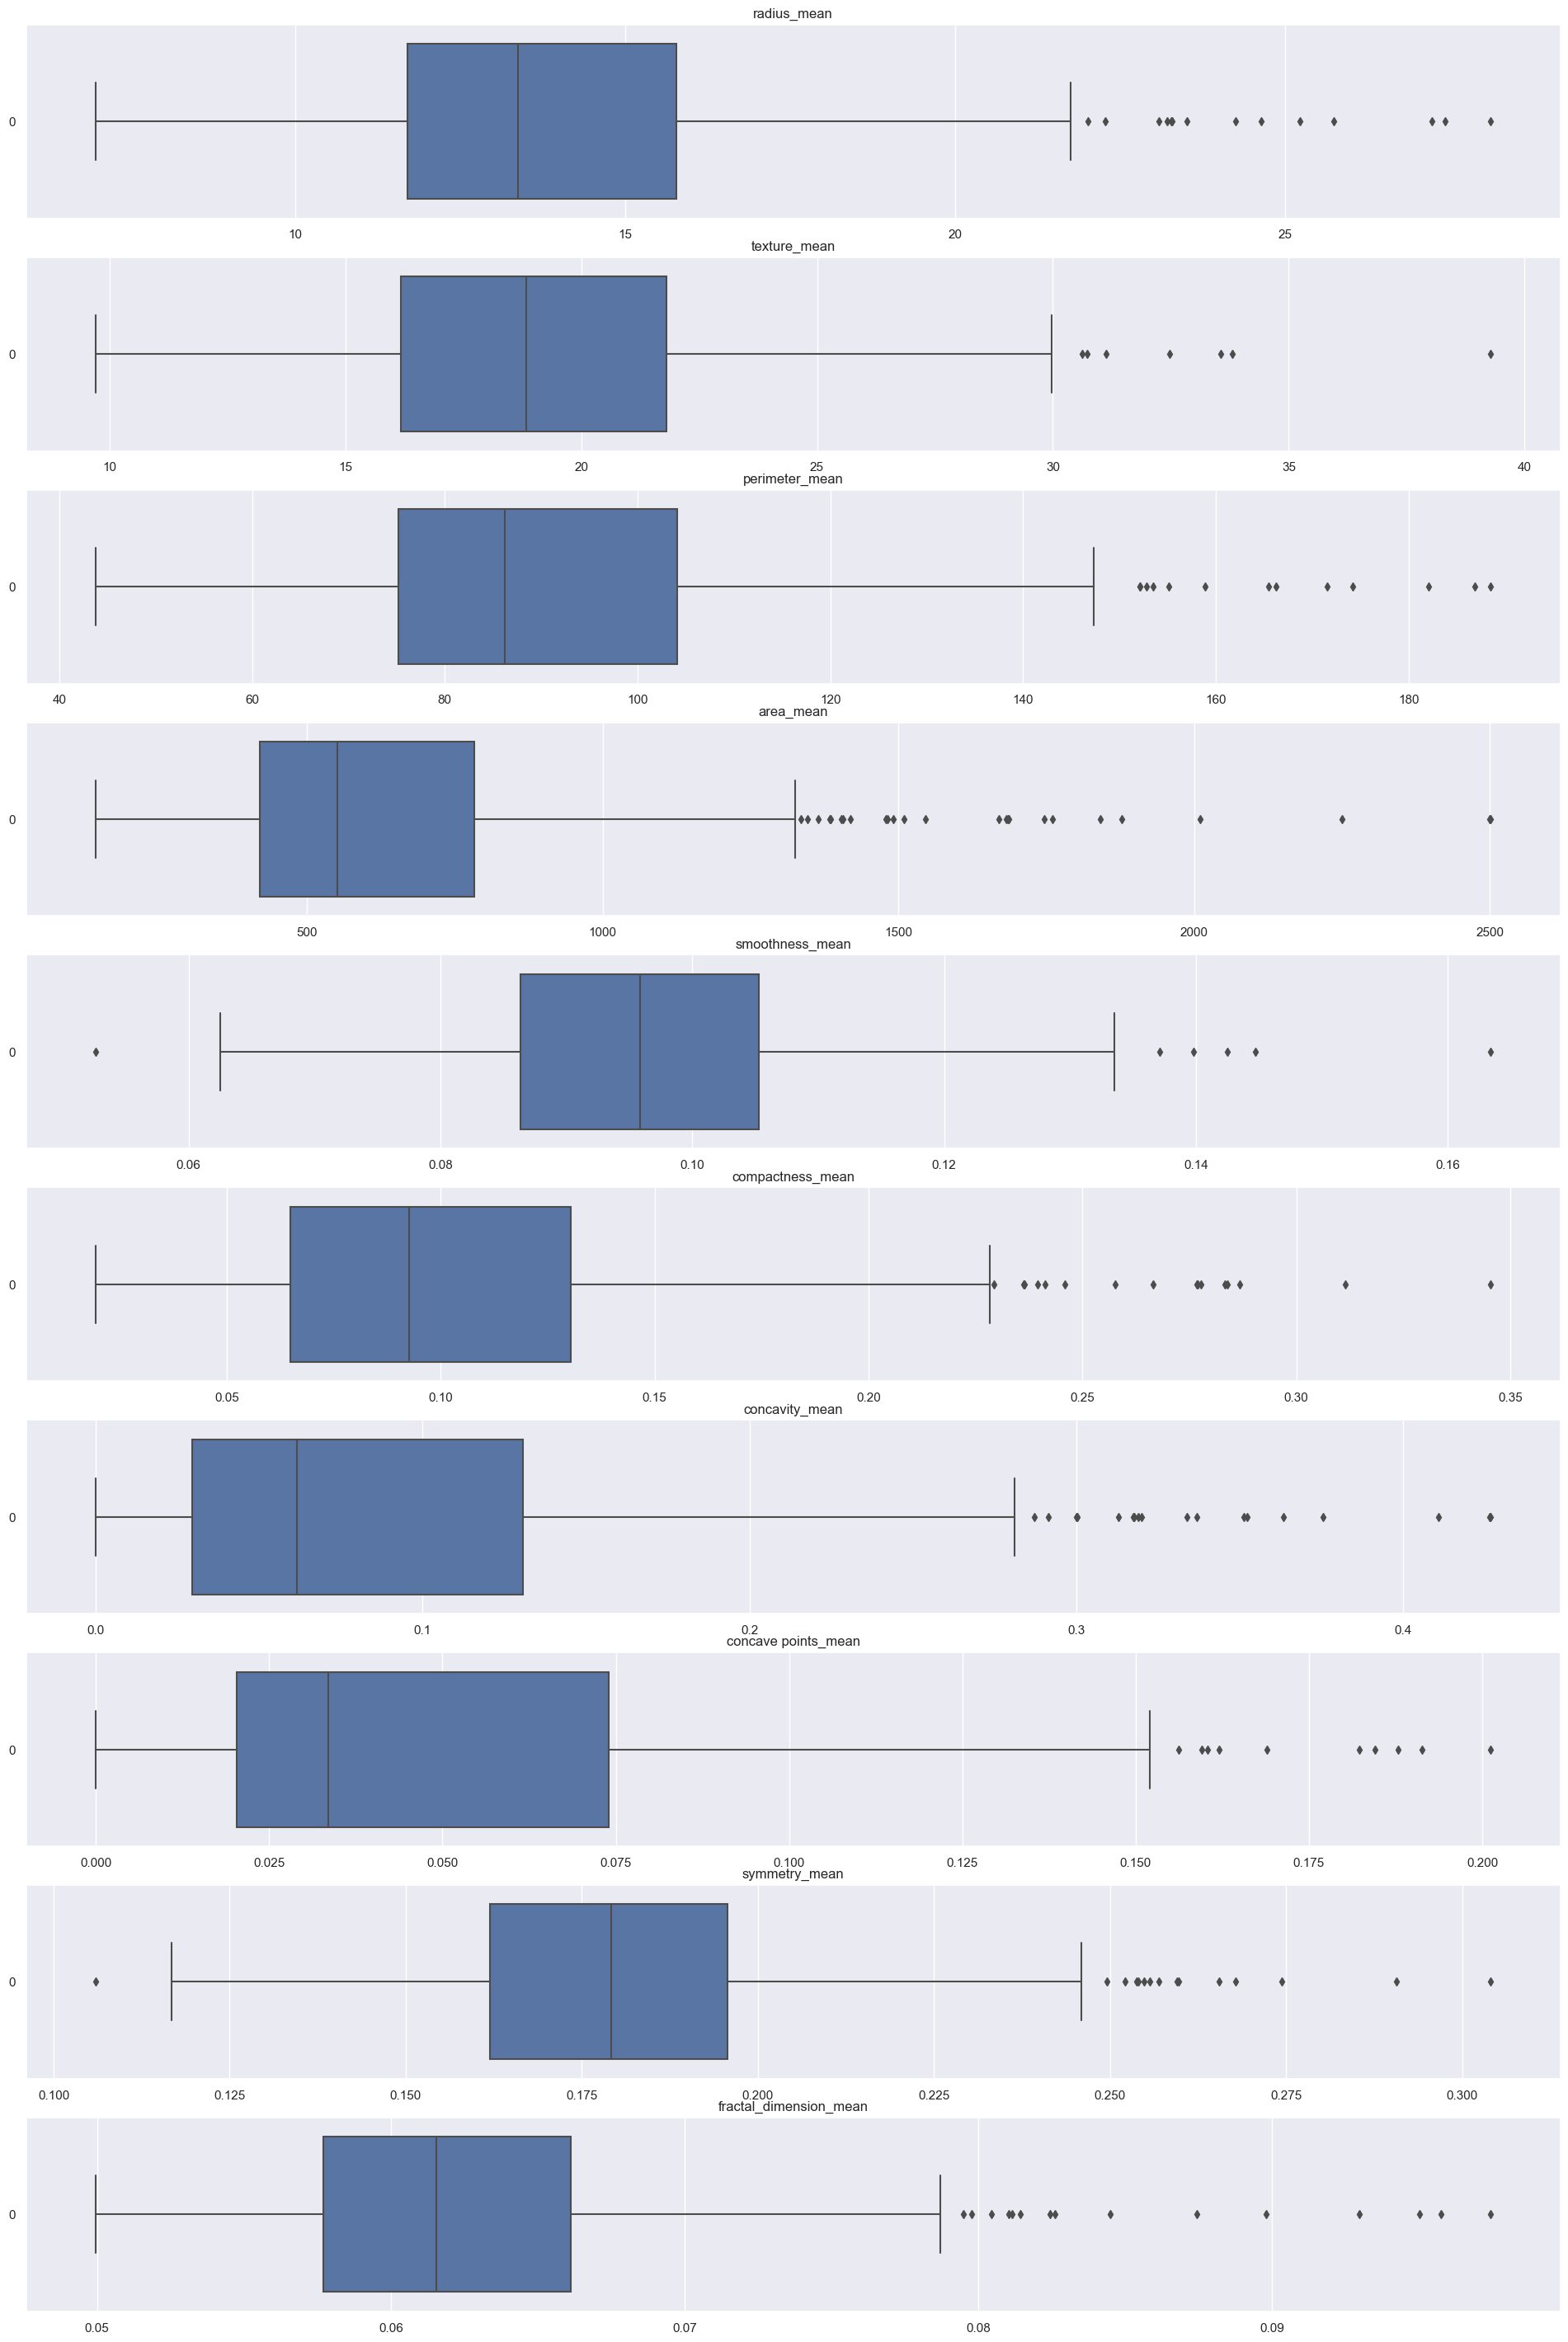

In [6]:
"""
    For the sake of Exploratory Data Analysis, we create a deep copy of the dataFrame in order to drop irrelevant columns such as `diagnosis` (the prediction response) and `id` (unique identifier for each row)
"""

# Set up subplots for ease of visualisation
f, axes = plt.subplots(10, 1, figsize=(24,36))

index = 0
for column in breastCancerdf_mean:
    if column=='id' or column=='diagnosis': continue
    sb.boxplot(data=breastCancerdf_mean[column], orient='h', ax=axes[index]).set(title=column)
    index += 1

### `Outliers`

Evident in the boxplots above, we see that each of the columns above have outliers that may lead to inaccuracies with our results. To verify this, we will check the number of outliers for each of the columns. We will primarily focus on outliers as those points lying outside of the Q1 - 1.5(IQR) and Q3 + 1.5(IQR) whiskers.

In [7]:
for col in breastCancerdf_mean:
    if col=='id' or col=='diagnosis': continue
    column = breastCancerdf_mean[col]
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    upper_whisker = q3 + 1.5*IQR
    lower_whisker = q1 - 1.5*IQR
    outliers = breastCancerdf_mean[(column < lower_whisker) | (column > upper_whisker)]
    print(f"{col} has {len(outliers)} outliers")

print(breastCancerdf_mean.count()) # number of rows before outlier removal

radius_mean has 14 outliers
texture_mean has 7 outliers
perimeter_mean has 13 outliers
area_mean has 25 outliers
smoothness_mean has 6 outliers
compactness_mean has 16 outliers
concavity_mean has 18 outliers
concave points_mean has 10 outliers
symmetry_mean has 15 outliers
fractal_dimension_mean has 15 outliers
id                        569
diagnosis                 569
radius_mean               569
texture_mean              569
perimeter_mean            569
area_mean                 569
smoothness_mean           569
compactness_mean          569
concavity_mean            569
concave points_mean       569
symmetry_mean             569
fractal_dimension_mean    569
dtype: int64


### `Outlier Removal`

In [8]:
""" OUTLIER REMOVAL """

for col in breastCancerdf_mean:
    if col=='id' or col=='diagnosis': continue

    column = breastCancerdf_mean[col]
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    upper_whisker = q3 + 1.5*IQR
    lower_whisker = q1 - 1.5*IQR
    breastCancerdf_mean = breastCancerdf_mean[(column > lower_whisker) & (column < upper_whisker)] # remove outliers
    outliers = breastCancerdf_mean[(column < lower_whisker) | (column > upper_whisker)]

    print(f"{col} has {len(outliers)} outliers")

print(breastCancerdf_mean.count()) # number of rows after outlier removal

radius_mean has 0 outliers
texture_mean has 0 outliers
perimeter_mean has 0 outliers
area_mean has 0 outliers
smoothness_mean has 0 outliers
compactness_mean has 0 outliers
concavity_mean has 0 outliers
concave points_mean has 0 outliers
symmetry_mean has 0 outliers
fractal_dimension_mean has 0 outliers
id                        458
diagnosis                 458
radius_mean               458
texture_mean              458
perimeter_mean            458
area_mean                 458
smoothness_mean           458
compactness_mean          458
concavity_mean            458
concave points_mean       458
symmetry_mean             458
fractal_dimension_mean    458
dtype: int64


/Users/wayne/opt/anaconda3/envs/sc1015/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


### `Verifying the resutls of the outlier removal`

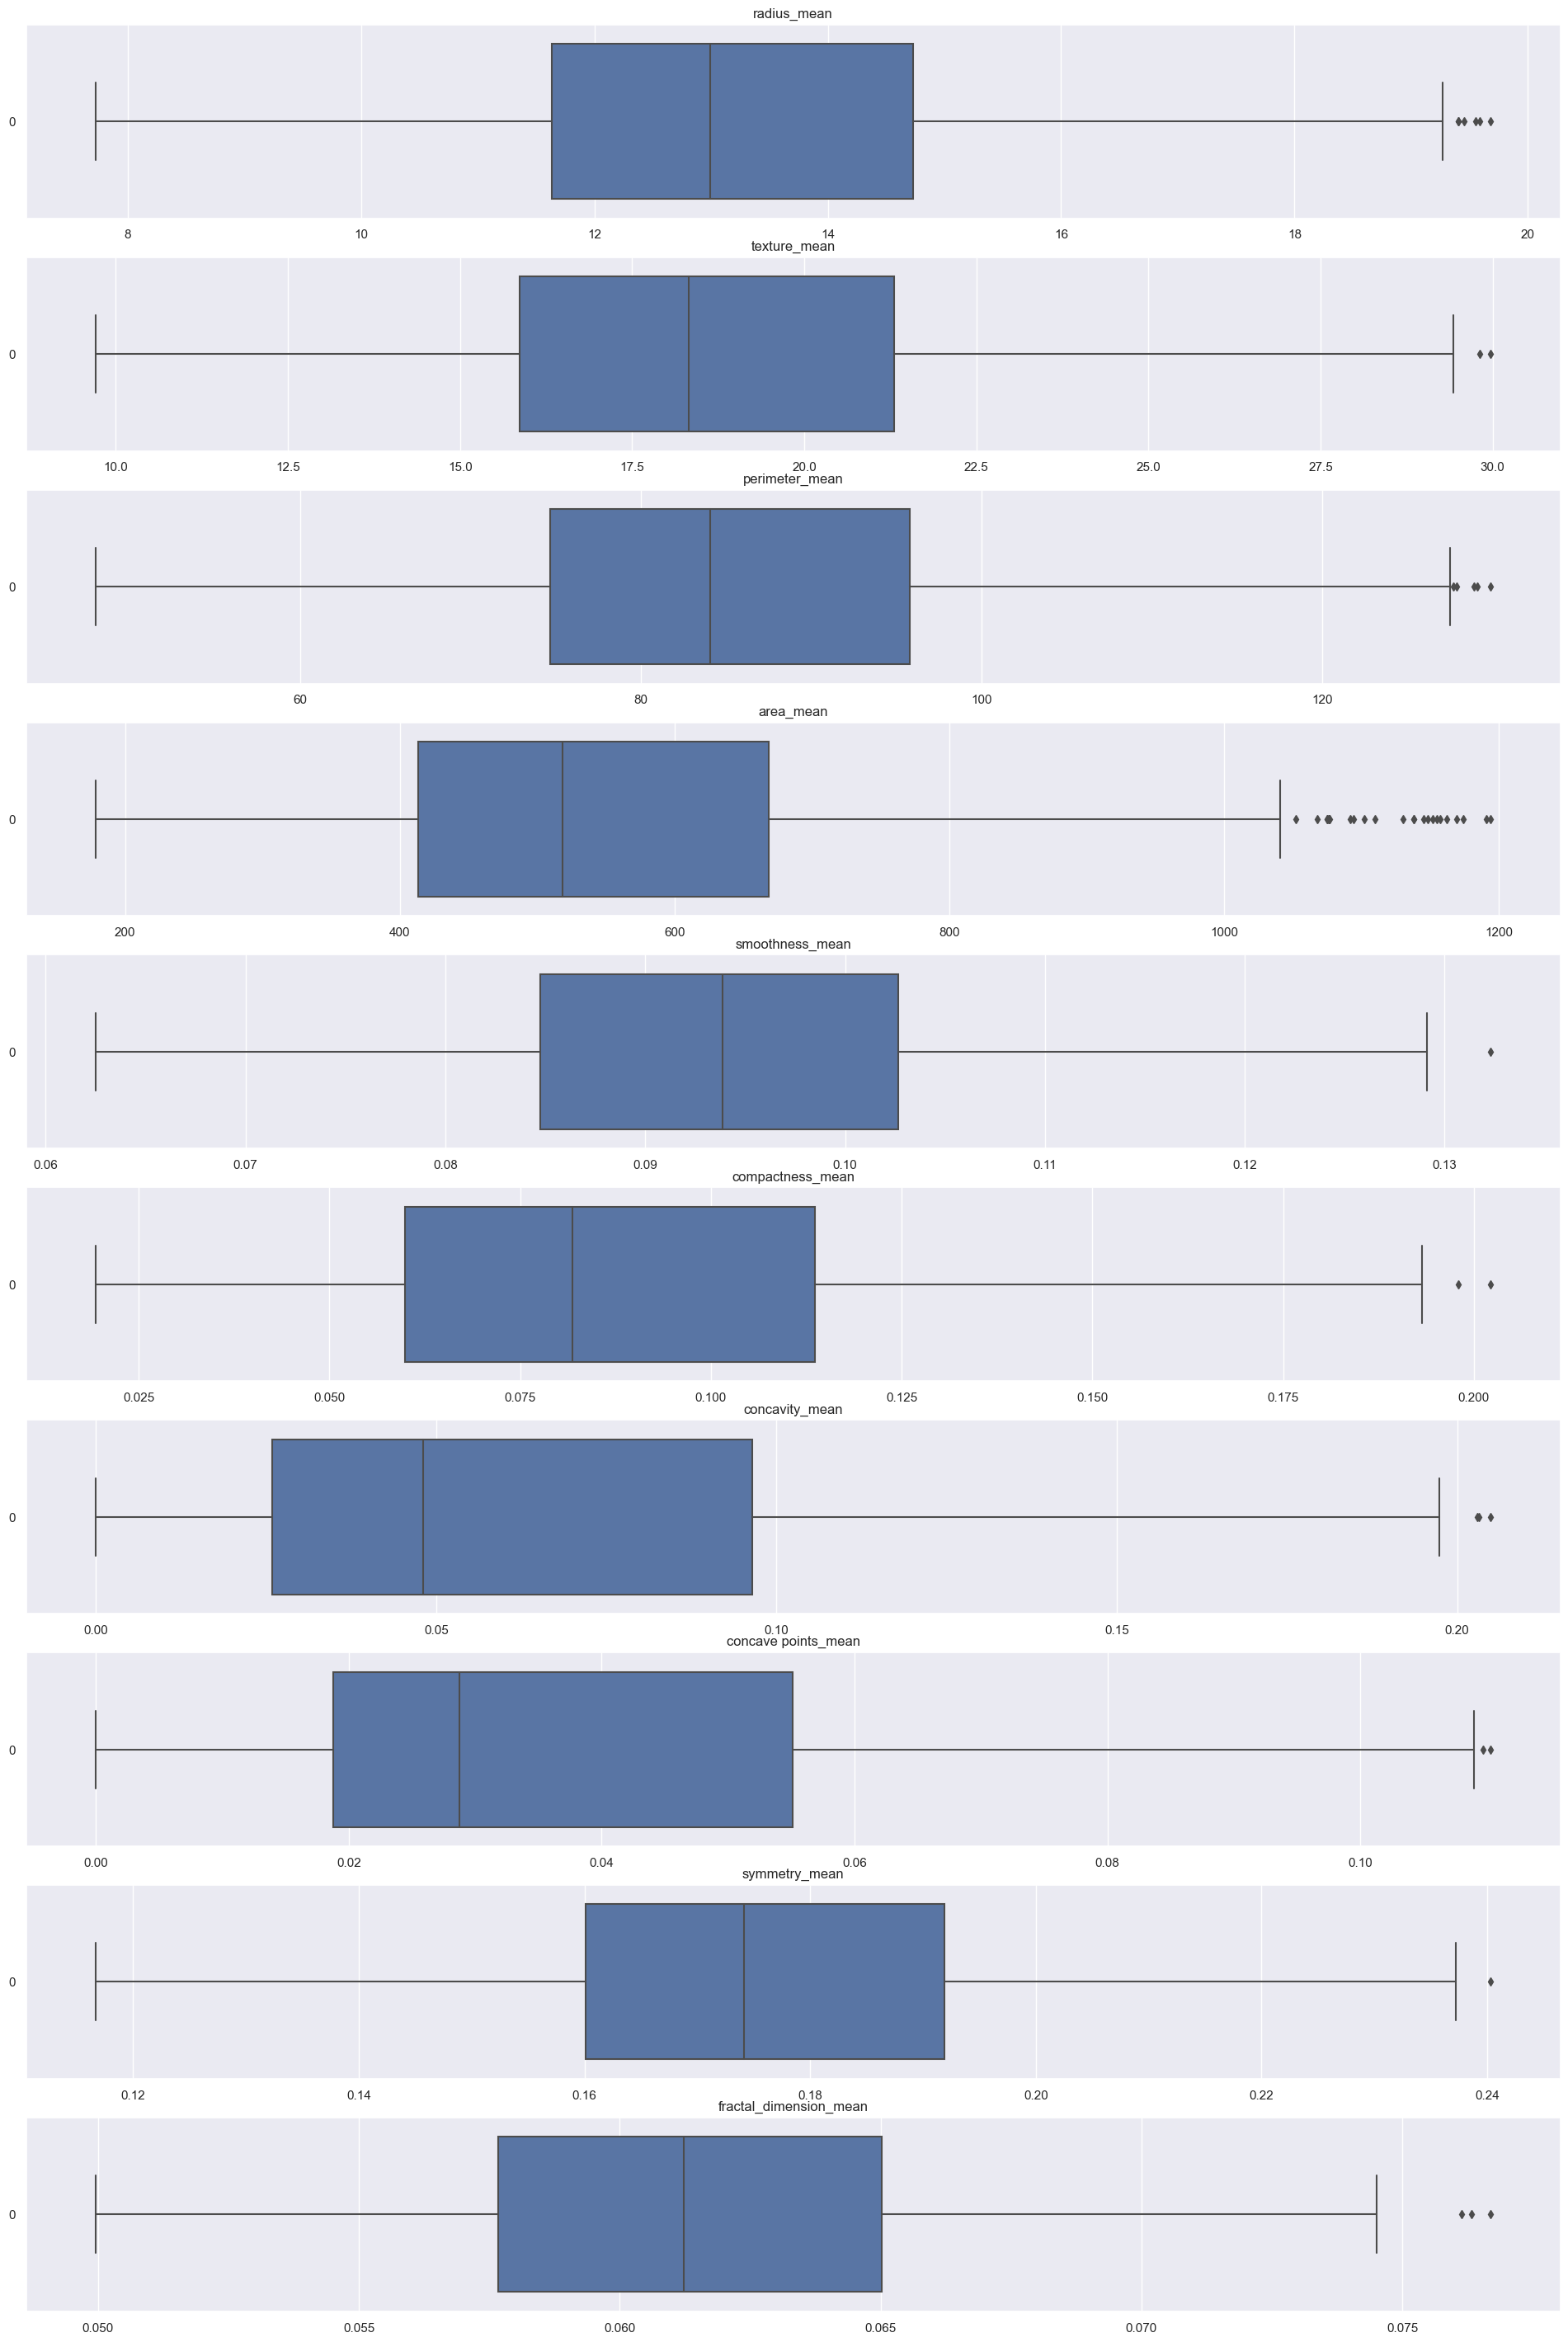

In [9]:
""" Re-plot boxplots to further visualise the dataset after outlier removal """

# Set up subplots for ease of visualisation
f, axes = plt.subplots(10, 1, figsize=(24,36))

index = 0
for column in breastCancerdf_mean:
    if column=='id' or column=='diagnosis': continue
    sb.boxplot(data=breastCancerdf_mean[column].values, orient='h', ax=axes[index]).set(title=column)
    index += 1

# awesome!

### `Further visualisation: Histograms`

Histograms allow us to better understand the distribution and skewness of data. Skewness can lead to inaccuracies in statistical models, especially regression-based ones since the tail region may act as an outlier for the model. 

Let us have a deeper look at which features exhibit a greater degree of skew.

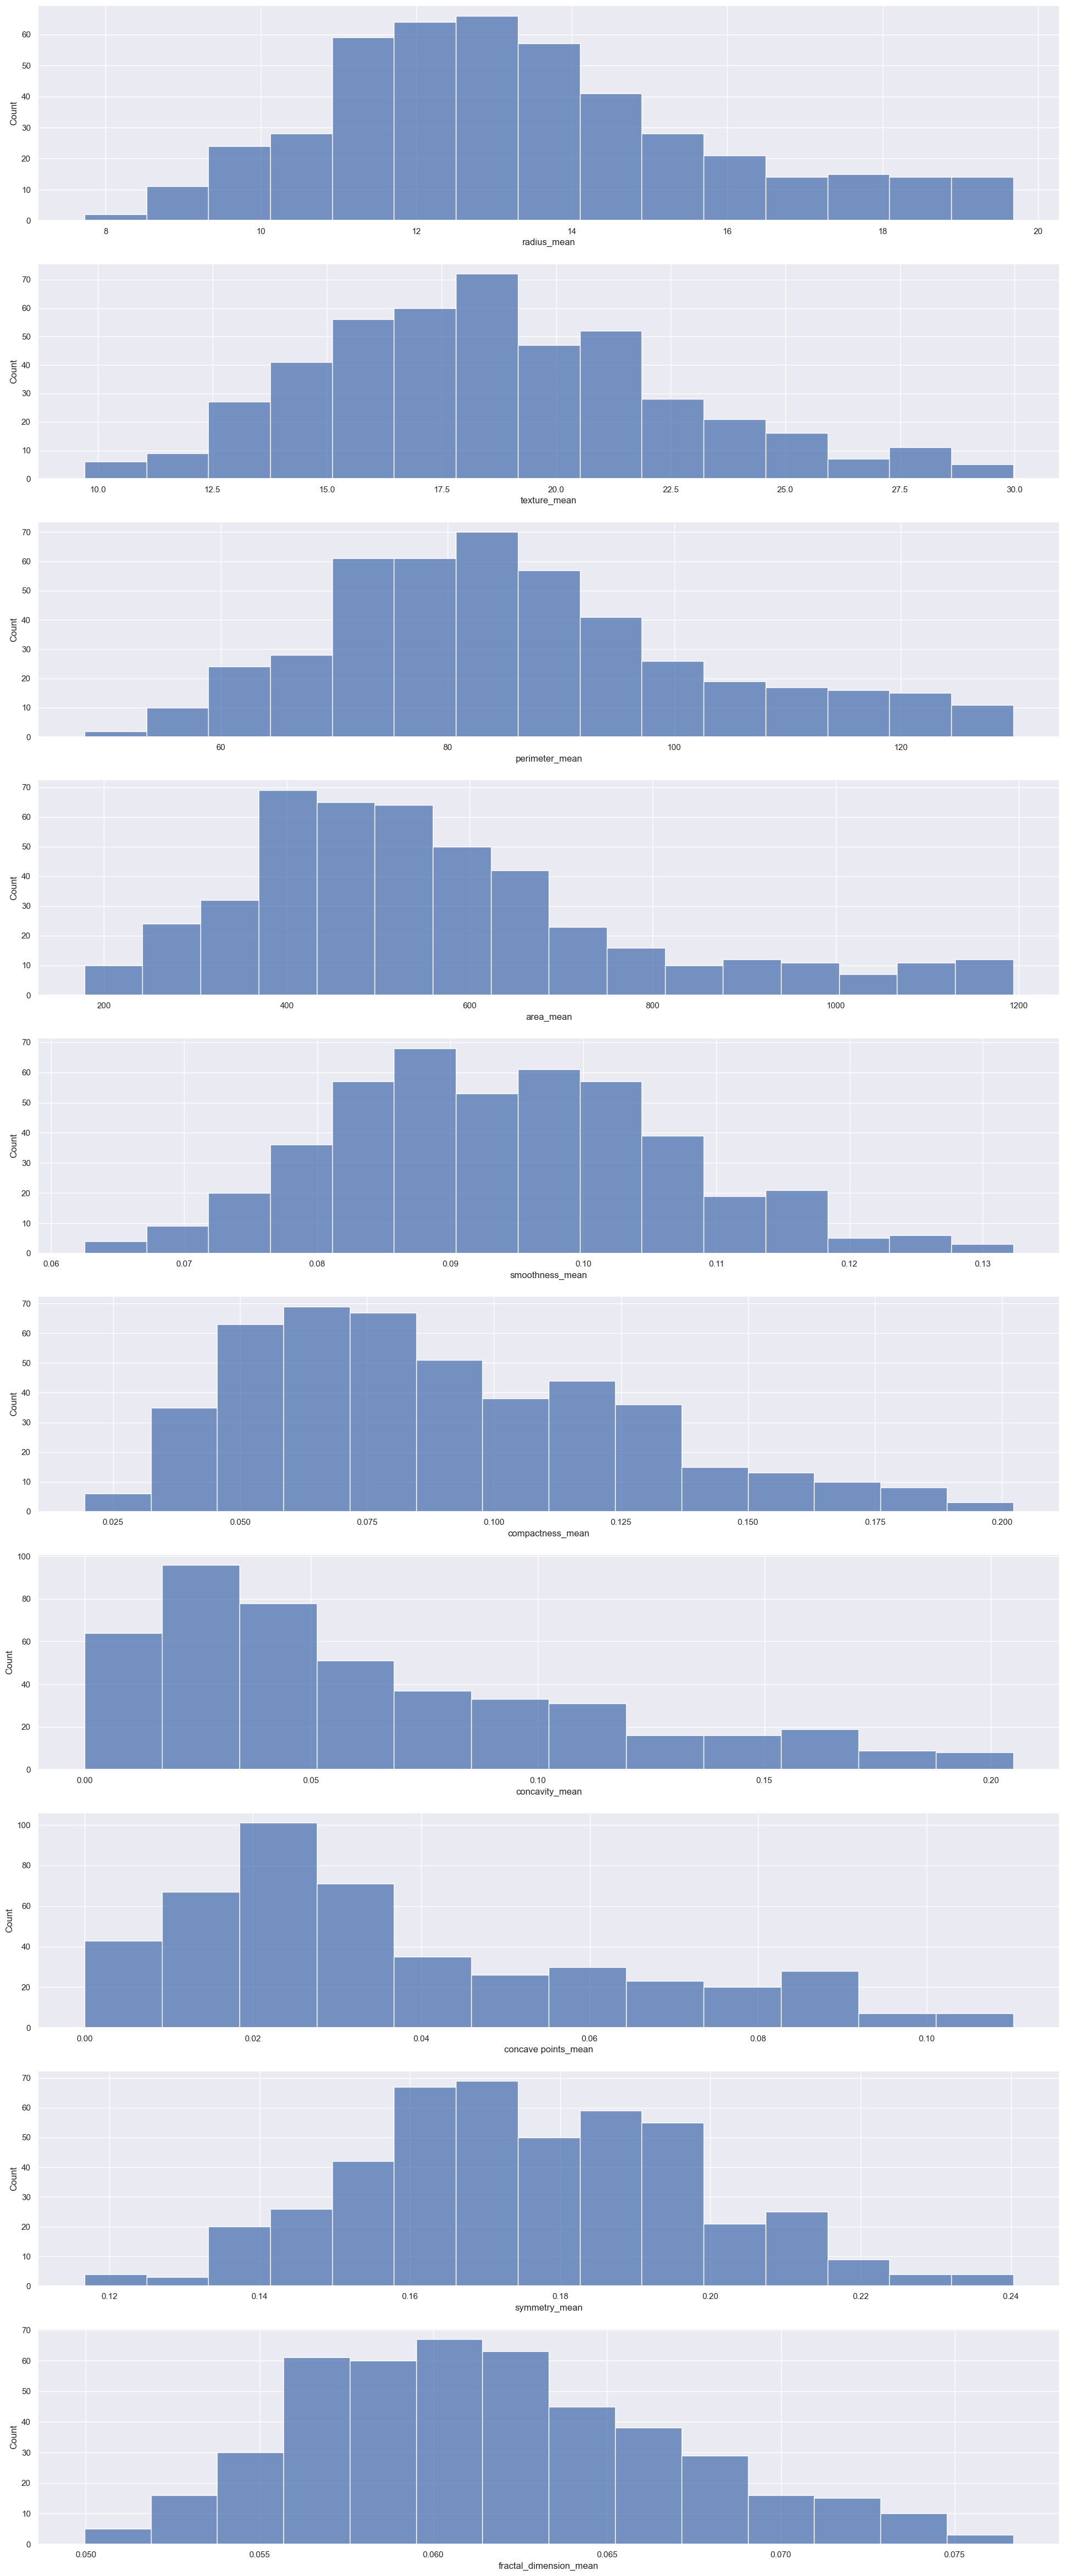

In [10]:
# Set up subplots for ease of visualisation
f, axes = plt.subplots(10, 1, figsize=(24, 60))

column_number = 0
for column in breastCancerdf_mean:
    if column=='id' or column=='diagnosis': continue
    sb.histplot(data=breastCancerdf_mean[column], ax=axes[column_number])
    column_number += 1

### `Analysis of Skew`

From the histograms, we see that some columns are skewed.

Positive skew:
- texture_mean
- area_mean
- compactness_mean
- concavity_mean
- concave points_mean

Negative skew:
nil

**We are interested in finding out which variables are best for predicting whether the breast cancer is benign or malignant.**

Half of the columns seem to exhibit a positive skew. However, this only provides us with an early sensing as to which variables might be more suitable for prediction. We cannot choose our variables based on this information yet. In order to arrive at a more convincing answer, we have to dive deeper by examining the swarm plots in conjuction with the box plots for each variable. 

`UP NEXT: A deeper look into feature selection through swarm plots and ANOVA Hypothesis Test`

### `Splitting the dataset into the train and test sets`

In [11]:
# set up the train and test sets
# Set up the train/test set (80/20 split)

y = breastCancerdf_mean.diagnosis
X = breastCancerdf_mean.iloc[:, 2:12]

y_train, y_test, X_train, X_test = train_test_split(y, X, random_state=10)



### `Swarm Plots for Feature Selection`

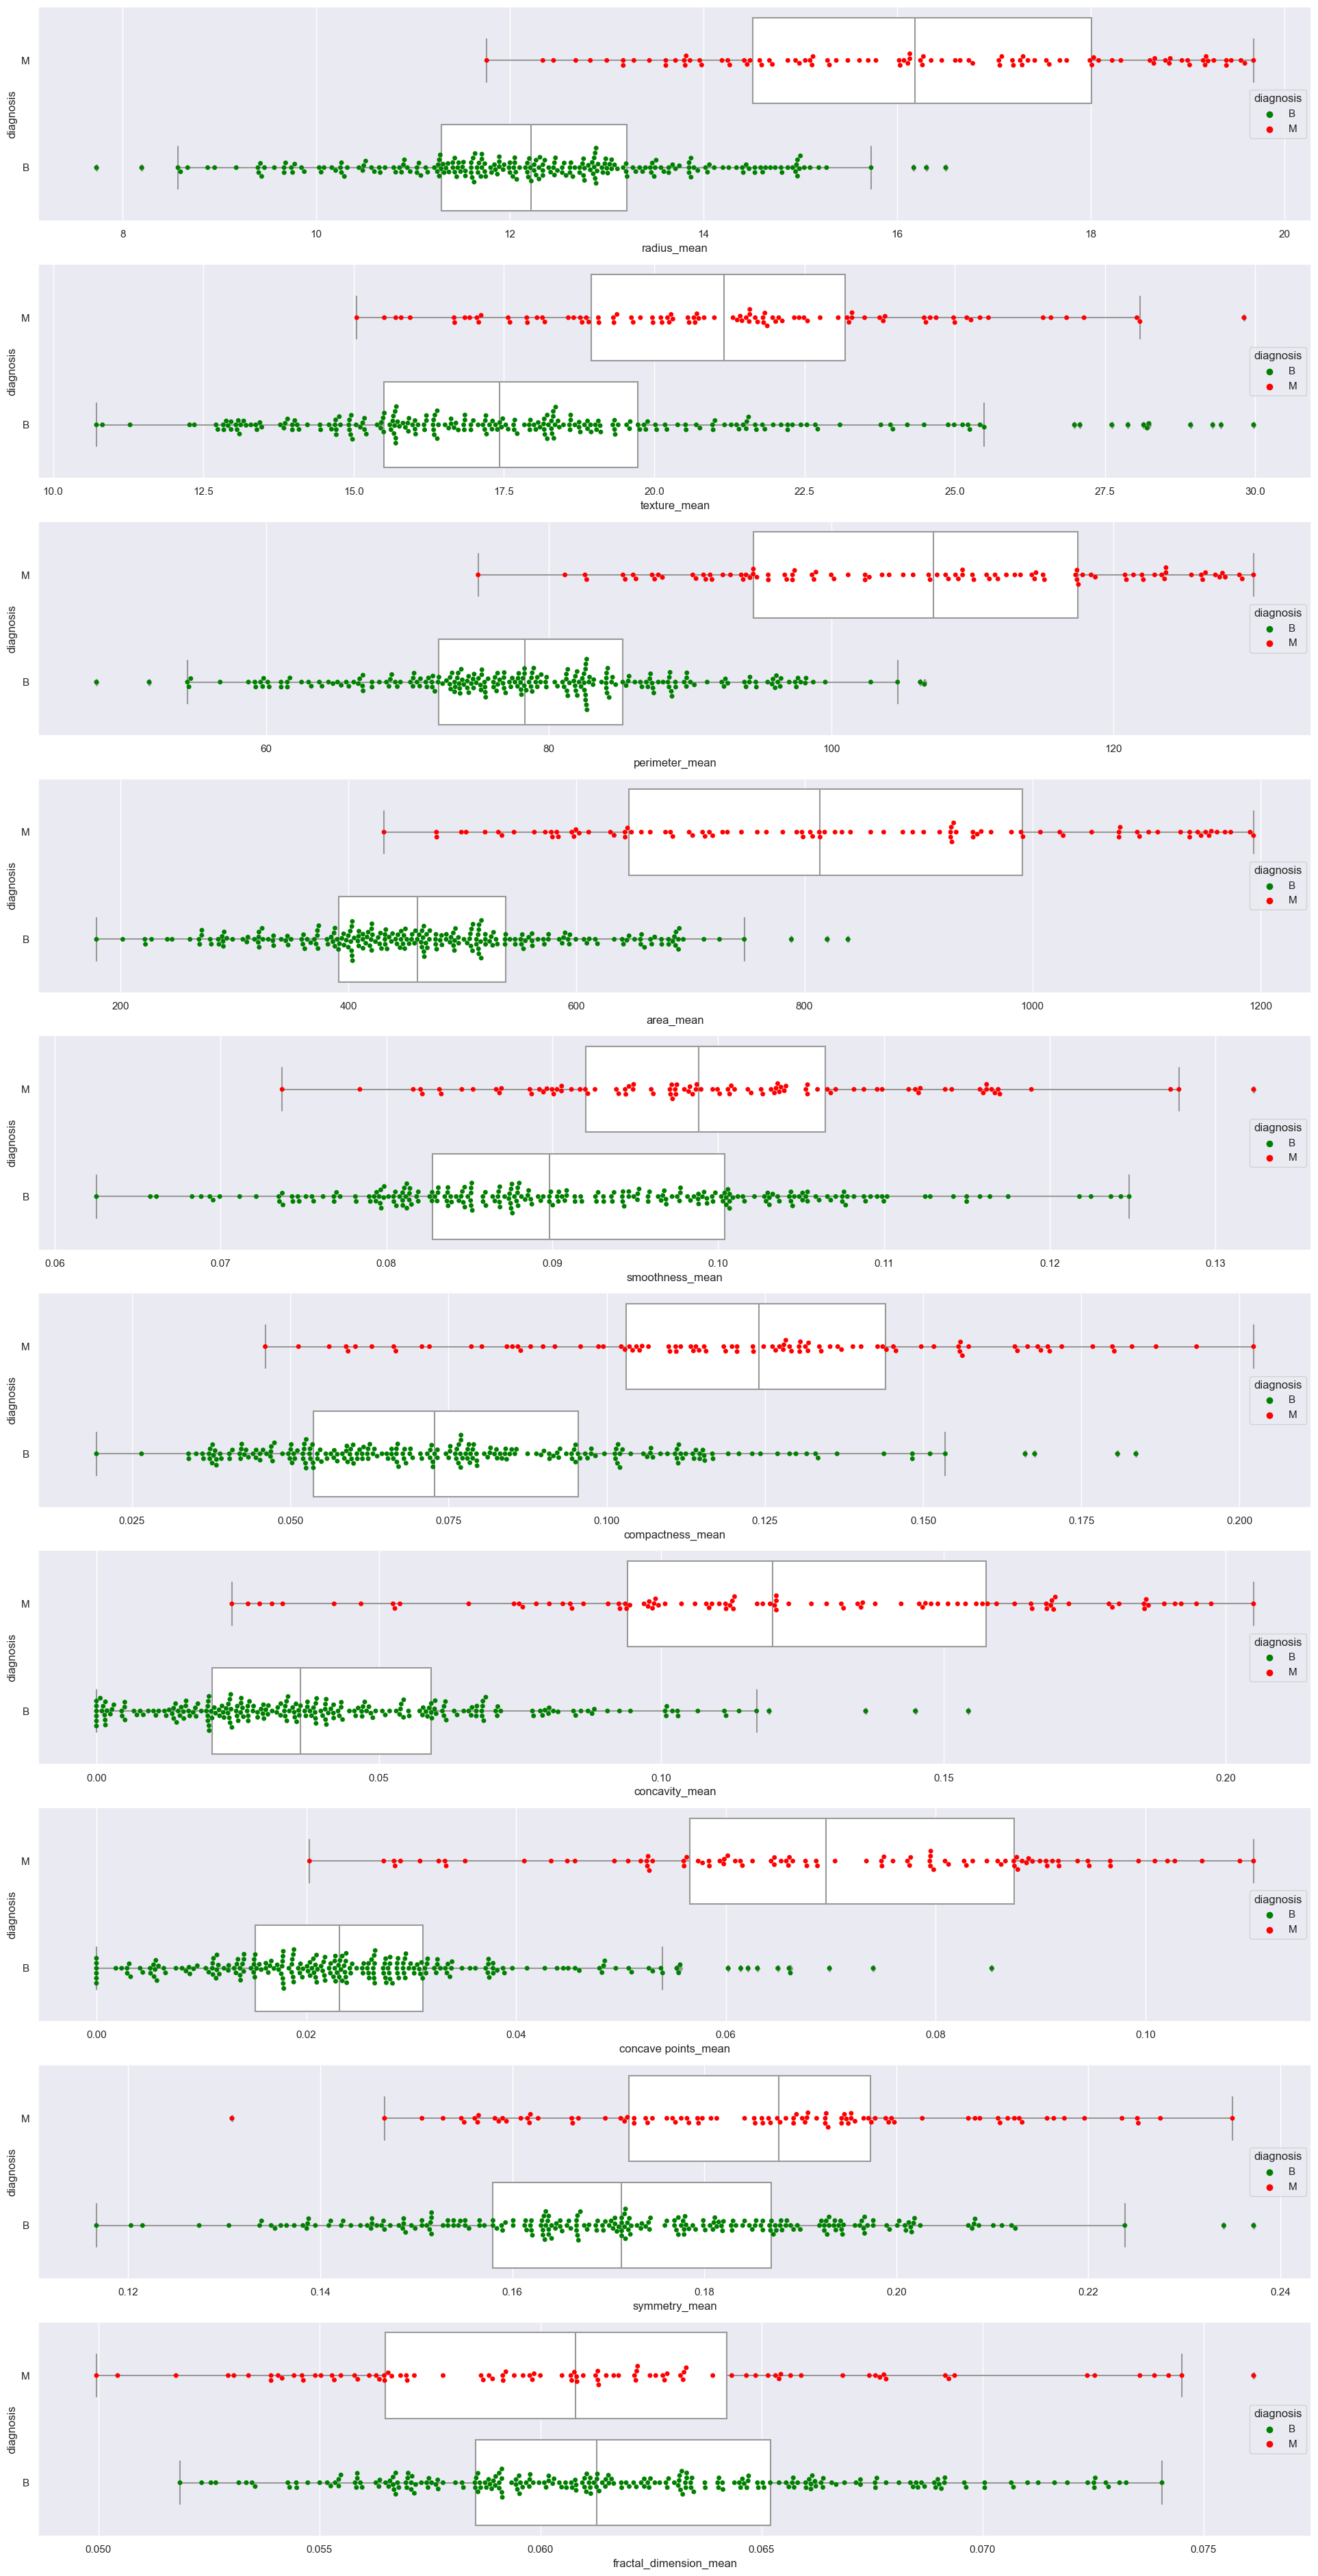

In [12]:
""" SWARM PLOTS FOR EACH OF THE 10 FEATURES """

f, axes = plt.subplots(10, 1, figsize=(24, 48))




sb.swarmplot(x = "radius_mean", hue=y_train ,hue_order=['B', 'M'], palette=['green', 'red'], y = y_train, data = X_train, orient = "h", ax=axes[0], order=['M', 'B'])
sb.boxplot(x = "radius_mean",y = y_train, color="white", data = X_train, orient = "h", ax=axes[0], order=['M', 'B'])

sb.swarmplot(x = "texture_mean", hue=y_train,hue_order=['B', 'M'], palette=['green', 'red'], y = y_train, data = X_train, orient = "h", ax=axes[1], order=['M', 'B'])
sb.boxplot(x = "texture_mean",y = y_train, color="white", data = X_train, orient = "h", ax=axes[1], order=['M', 'B'])

sb.swarmplot(x = "perimeter_mean", hue=y_train,hue_order=['B', 'M'], palette=['green', 'red'], y = y_train, data = X_train, orient = "h", ax=axes[2], order=['M', 'B'])
sb.boxplot(x = "perimeter_mean",y = y_train, color="white", data = X_train, orient = "h", ax=axes[2], order=['M', 'B'])

sb.swarmplot(x = "area_mean", hue=y_train,hue_order=['B', 'M'], palette=['green', 'red'], y = y_train, data = X_train, orient = "h", ax=axes[3], order=['M', 'B'])
sb.boxplot(x = "area_mean",y = y_train, color="white", data = X_train, orient = "h", ax=axes[3], order=['M', 'B'])

sb.swarmplot(x = "smoothness_mean", hue=y_train,hue_order=['B', 'M'], palette=['green', 'red'], y = y_train, data = X_train, orient = "h", ax=axes[4], order=['M', 'B'])
sb.boxplot(x = "smoothness_mean",y = y_train, color="white", data = X_train, orient = "h", ax=axes[4], order=['M', 'B'])

sb.swarmplot(x = "compactness_mean", hue=y_train,hue_order=['B', 'M'], palette=['green', 'red'], y = y_train, data = X_train, orient = "h", ax=axes[5], order=['M', 'B'])
sb.boxplot(x = "compactness_mean",y = y_train, color="white", data = X_train, orient = "h", ax=axes[5], order=['M', 'B'])

sb.swarmplot(x = "concavity_mean", hue=y_train,hue_order=['B', 'M'], palette=['green', 'red'], y = y_train, data = X_train, orient = "h", ax=axes[6], order=['M', 'B'])
sb.boxplot(x = "concavity_mean",y = y_train, color="white", data = X_train, orient = "h", ax=axes[6], order=['M', 'B'])

sb.swarmplot(x = "concave points_mean", hue=y_train,hue_order=['B', 'M'], palette=['green', 'red'], y = y_train, data = X_train, orient = "h", ax=axes[7], order=['M', 'B'])
sb.boxplot(x = "concave points_mean",y = y_train, color="white", data = X_train, orient = "h", ax=axes[7], order=['M', 'B'])

sb.swarmplot(x = "symmetry_mean", hue=y_train,hue_order=['B', 'M'], palette=['green', 'red'], y = y_train, data = X_train, orient = "h", ax=axes[8], order=['M', 'B'])
sb.boxplot(x = "symmetry_mean",y = y_train, color="white", data = X_train, orient = "h", ax=axes[8], order=['M', 'B'])

sb.swarmplot(x = "fractal_dimension_mean", hue=y_train,hue_order=['B', 'M'], palette=['green', 'red'], y = y_train, data = X_train, orient = "h", ax=axes[9], order=['M', 'B'])
sb.boxplot(x = "fractal_dimension_mean",y = y_train, color="white", data = X_train, orient = "h", ax=axes[9], order=['M', 'B'])

for i in range(0,10):
    sb.move_legend(axes[i], "right")



### `Swarm Plot Analysis`

We select the better features for model prediction by prioritizing a **low** degree of overlap between the Benign and Malignant box plots. 

Looking at the swarm plots, we have our initial top 5 features that exhibit the lowest degrees of overlap between the Benign and Malignant box plots. They are:

- Radius Mean
- Concavity Mean
- Concave Points Mean
- Perimeter Mean
- Area Mean

However, if you are like us, you will not be entirely satisfied with this selection yet. Surely, more can be done to further verify if these features are indeed the most suitable ones for our project. This leads us to the ANOVA Hypothesis Test.

### `ANOVA HYPOTHESIS TEST` 

In [13]:
# ANOVA Test
corr_dict = {}

for column in X_train:
    colList = X_train.groupby(y_train)[column].apply(list)
    colResults = f_oneway(*colList)
    corr_dict[column] = colResults[1] 

corr_dict = sorted(corr_dict.items(), key=lambda x:x[1])

corrDf = pd.DataFrame(corr_dict)
corrDf.rename(columns={0:'feature', 1:'P-value'}, inplace=True)

# print(corr_dict)
corrDf



,feature,P-value
0,concave points_mean,4.734656e-68
1,area_mean,3.246072e-58
2,perimeter_mean,9.893705e-58
3,concavity_mean,4.462167e-57
4,radius_mean,1.245378e-54
5,compactness_mean,5.309499e-28
6,texture_mean,1.516865e-12
7,smoothness_mean,5.330512e-09
8,symmetry_mean,3.646212e-08
9,fractal_dimension_mean,1.608488e-01


To determine whether or not a numerical variable is correlated to a categorical variable, we can perform an ANOVA hypothesis test. This was the most suitable in our case as our data set comprised of a categorical target variable (Whether or not the diagnosis was MALIGNANT or BENIGN), and other numerical predictors, such as perimeter, area, etc. The full list of features and their descriptions can be found in data_description.txt.

The ANOVA Hypothesis test was conducted with the help of f_oneway in scipy.stats. The P-value is defined as the probability under the assumption of no effect or no difference (null hypothesis), of obtaining a result equal to or more extreme than what was actually observed. Hence, in the selection of the features for model prediction, we decided to rank the features by their P-value, and then selecting the top 5 values for use in the classifier.

This is also congruent with a visual confirmation of the swarmplots as plotted above. For example, in the swarm plot for concave points_mean, we see that for a MALIGNANT and a BENIGN tumour, the datapoints are rather distinct, with the box plots being quite far away from each other. On the other hand, for fractal_dimension_mean, we see that the boxplots for MALIGNANT and BENIGN are almost on top of one another. The P-value of 0.5614 confirms this, as we accept the null hypothesis that fractal_dimension_mean is not correlated to the diagnosis of MALIGNANT or BENIGN.


The top 5 features:
- `concave points_mean`
- `concavity_mean`
- `area_mean`
- `perimeter_mean`
- `radius_mean`


References

https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/

https://www.google.com/search?q=f_oneway&oq=f_oneway&aqs=chrome..69i57j0i512j0i390i650l3.1629j0j7&sourceid=chrome&ie=UTF-8

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4111019/#:~:text=The%20P%20value%20is%20defined,groups%20is%20due%20to%20chance.




# `Machine Learning`

Now that we have selected the top 5 features and performed Data Cleaning, let us run the dataset through a series of Machine Learning models and identify which one leads to the highest prediction accuracy.

In total, we have selected **4** models:
- Decision Tree Classifier
- Logistic Regression
- Random Forest
- Support Vector Machine with Grid Search 



`Rationale for model selections`

Dataset Types
- Our dataset comprised predominantly continuous variables, and our goal was to predict a categorical variable.

Interpretability
- Because the model is meant to be used in a medical context, it is important for the model to be interpretable.

Performance
- The model needed to perform well on metrics which were used for validation in the healthcare industry.


## `Model 1: SVC With Grid`

Support Vector Machine (SVM) is a supervised machine learning technique which are good for classification problems with small dataset sizes.

- Non-Linearity: SVM is good with dealing with non-linear data as a result of their inbuilt kernels (polynomial, rbf, sigmoid etc.)

- Hyperparameters: SVM has a few hyperparameters, making it easier to tune. 

- Grid Search: Computationally inexpensive in SVM implementation due to the few hyperparameters. 


Classification Accuracy: 0.8695652173913043

Classification Report:
               precision    recall  f1-score   support

           B       0.88      0.95      0.92        87
           M       0.81      0.61      0.69        28

    accuracy                           0.87       115
   macro avg       0.85      0.78      0.81       115
weighted avg       0.87      0.87      0.86       115



Text(47.25, 0.5, 'True labels')

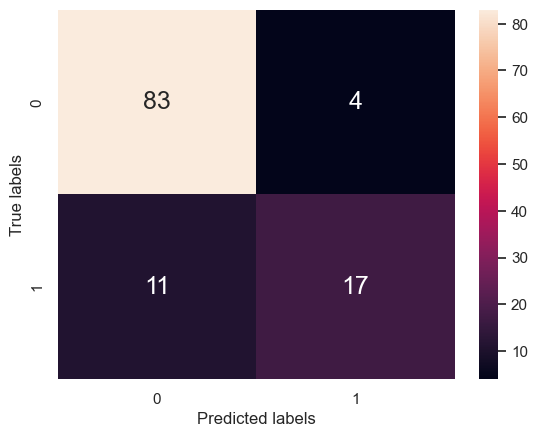

In [14]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



# preprocess dataset with only the relevant features

# Set up the grid search with SVM
param_grid = {'C': [0.1, 1, 10, 100,200,300,301,310,320,330,340,350,360,370,380,390,400,500,600,700,1000], 'kernel': ['rbf'], 'gamma': ['scale', 'auto']}
svc = svm.SVC(probability=True)
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Evaluate the best model on the test data
y_pred = grid_search.predict(X_test)
print("Classification Accuracy:", grid_search.score(X_test, y_test))
print()
print('Classification Report:\n', classification_report(y_test, y_pred))

ax= plt.subplot()
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=ax);  

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

## `Model 2: Random Forest`

An ensemble learning technique which combines multiple decision trees to create a more accurate and robust model.

- Improved Accuracy compared to a single decision tree.

- Resilience to Overfitting: Random Feature selection of 400-1200 decision trees make Random Forest less prone to overfitting.


Classification Accuracy: 0.9478260869565217

Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.97      0.97        87
           M       0.89      0.89      0.89        28

    accuracy                           0.95       115
   macro avg       0.93      0.93      0.93       115
weighted avg       0.95      0.95      0.95       115



Text(47.25, 0.5, 'True labels')

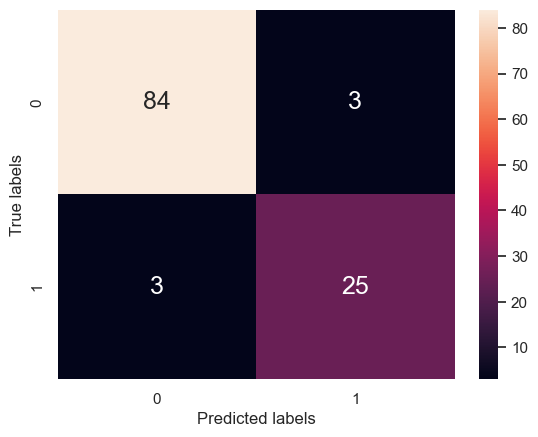

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



# Instantiate the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Predict on the test data
y_pred = rfc.predict(X_test)

print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print()
print('Classification Report:\n', classification_report(y_test, y_pred))

ax= plt.subplot()
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=ax);  

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')



## `Model 3: Logistic Regression`

Logistic regression is a statistical method used for binary classification, where the goal is to predict the probability of an input instance belonging to one of two classes.

- Simplicity: Logistic Regression models are easily implementable and highly interpretable.

- Versatility: Able to be used for a wide range of binary classification tasks



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score

import warnings
# ignore all warnings to prevent getting scared unnecessarily
warnings.filterwarnings('ignore')

"""
We choose the hyperparameter C to be relatively small (0.1) compared to its default value of 1 since we are unsure if the dataset is truly representative of real world situation in breast cancer. This small C value places a larger weightage on the complexity penalty for extreme parameters in the model.
"""
log_reg = LogisticRegression(C = 0.1)
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [17]:
# make prediction using the model

log_pred = log_reg.predict(X_test)

In [18]:
""" Accuracy data for both train and test datasets """

print(f"y_train accuracy: {accuracy_score(y_train, log_reg.predict(X_train))}") # train

log_reg_acc = accuracy_score(y_test, log_pred) # test
print(f"y_test accuracy: {log_reg_acc}")

y_train accuracy: 0.9008746355685131
y_test accuracy: 0.8782608695652174


In [19]:
# Define the cross-validation technique
cv = KFold(n_splits= 5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(log_reg, X_train, y_train, scoring='accuracy', cv=cv)

# Print the mean accuracy across all folds
print('Mean accuracy: %.3f' % (scores.mean()))

Mean accuracy: 0.898


In [20]:
cf_matrix = confusion_matrix(y_test,log_pred)
print(cf_matrix)
print('*'*50)
print(classification_report(y_test, log_pred))

[[79  8]
 [ 6 22]]
**************************************************
              precision    recall  f1-score   support

           B       0.93      0.91      0.92        87
           M       0.73      0.79      0.76        28

    accuracy                           0.88       115
   macro avg       0.83      0.85      0.84       115
weighted avg       0.88      0.88      0.88       115



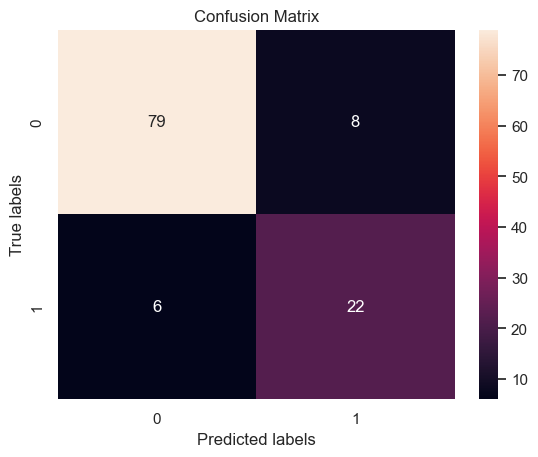

In [21]:
ax= plt.subplot()
sb.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

## `Model 4: Multi-Variate Classification Tree`

A graphical representation of decision-making processes or decision rules that can be used to predict outcomes based on input features of variables.

- Automatic Feature Selection: Decision Trees can automatically select important variables from the input data. 

- Interpretability: Decision Trees are highly interpretable, giving them an advantage in the healthcare setting.

- Ease of use: Decision Trees are easy to implement, and 
      do not require complex calculations or intensive
      computational resources.


Here, we decided to explore both a model with Tree Height 2 and a model with Tree Height 4, to determine which one leads to a higher classification accuracy.

### Tree Height 2

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9358600583090378

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9217391304347826

Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.94      0.95        87
           M       0.83      0.86      0.84        28

    accuracy                           0.92       115
   macro avg       0.89      0.90      0.90       115
weighted avg       0.92      0.92      0.92       115



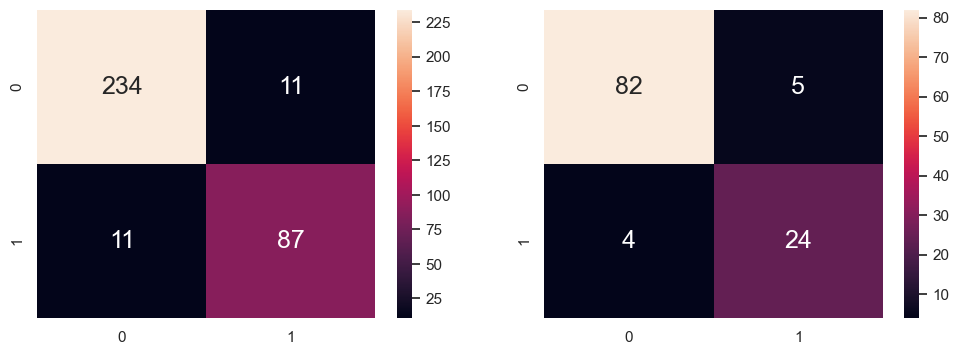

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print('Classification Report:\n', classification_report(y_test, y_test_pred))

[Text(0.5, 0.8333333333333334, 'concave points_mean <= 0.056\ngini = 0.408\nsamples = 343\nvalue = [245, 98]\nclass = Benign'),
 Text(0.25, 0.5, 'area_mean <= 696.25\ngini = 0.157\nsamples = 257\nvalue = [235, 22]\nclass = Benign'),
 Text(0.125, 0.16666666666666666, 'gini = 0.087\nsamples = 241\nvalue = [230, 11]\nclass = Benign'),
 Text(0.375, 0.16666666666666666, 'gini = 0.43\nsamples = 16\nvalue = [5, 11]\nclass = Malignant'),
 Text(0.75, 0.5, 'texture_mean <= 14.515\ngini = 0.206\nsamples = 86\nvalue = [10, 76]\nclass = Malignant'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Benign'),
 Text(0.875, 0.16666666666666666, 'gini = 0.136\nsamples = 82\nvalue = [6, 76]\nclass = Malignant')]

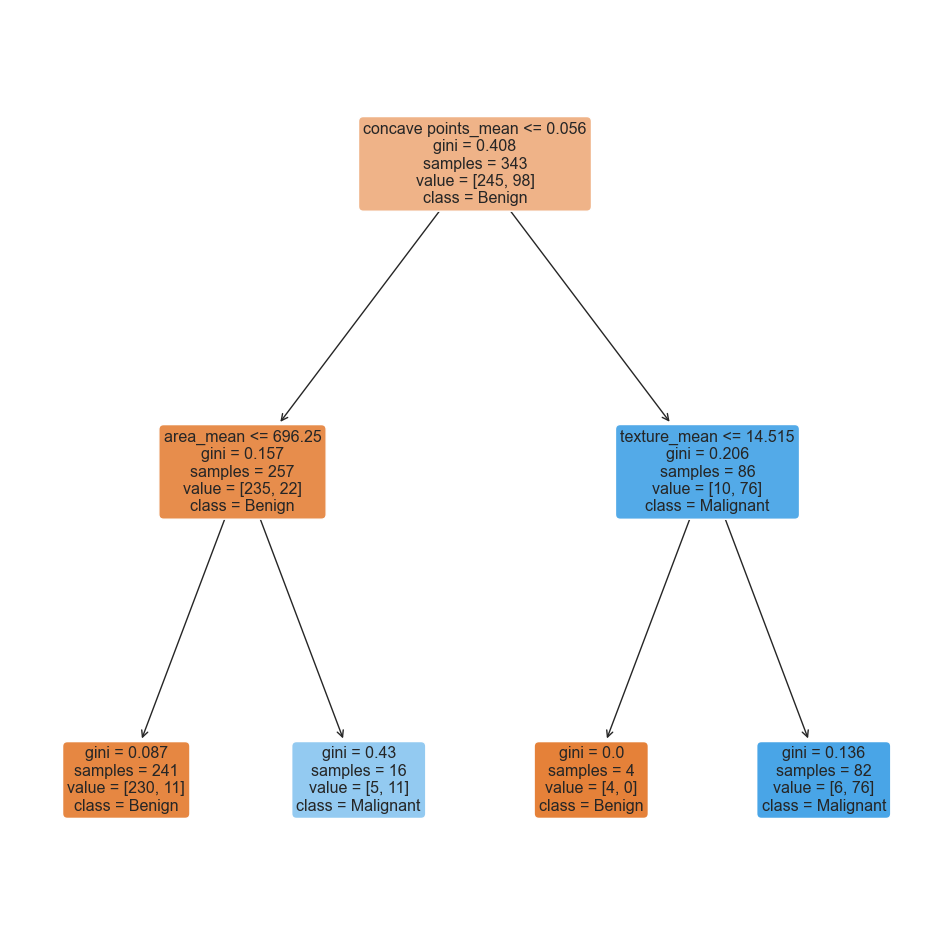

In [23]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Benign","Malignant"])

### Tree Height 4

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9708454810495627

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9217391304347826

Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.95      0.95        87
           M       0.85      0.82      0.84        28

    accuracy                           0.92       115
   macro avg       0.90      0.89      0.89       115
weighted avg       0.92      0.92      0.92       115



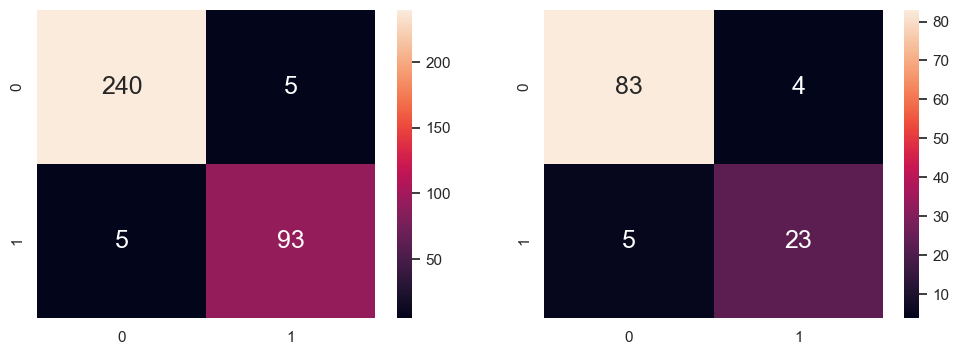

In [24]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print('Classification Report:\n', classification_report(y_test, y_test_pred))



[Text(0.5972222222222222, 0.9, 'concave points_mean <= 0.056\ngini = 0.408\nsamples = 343\nvalue = [245, 98]\nclass = Benign'),
 Text(0.4166666666666667, 0.7, 'area_mean <= 696.25\ngini = 0.157\nsamples = 257\nvalue = [235, 22]\nclass = Benign'),
 Text(0.2222222222222222, 0.5, 'concave points_mean <= 0.045\ngini = 0.087\nsamples = 241\nvalue = [230, 11]\nclass = Benign'),
 Text(0.1111111111111111, 0.3, 'area_mean <= 562.15\ngini = 0.027\nsamples = 219\nvalue = [216, 3]\nclass = Benign'),
 Text(0.05555555555555555, 0.1, 'gini = 0.011\nsamples = 184\nvalue = [183, 1]\nclass = Benign'),
 Text(0.16666666666666666, 0.1, 'gini = 0.108\nsamples = 35\nvalue = [33, 2]\nclass = Benign'),
 Text(0.3333333333333333, 0.3, 'texture_mean <= 19.615\ngini = 0.463\nsamples = 22\nvalue = [14, 8]\nclass = Benign'),
 Text(0.2777777777777778, 0.1, 'gini = 0.245\nsamples = 14\nvalue = [12, 2]\nclass = Benign'),
 Text(0.3888888888888889, 0.1, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]\nclass = Malignant'),
 Te

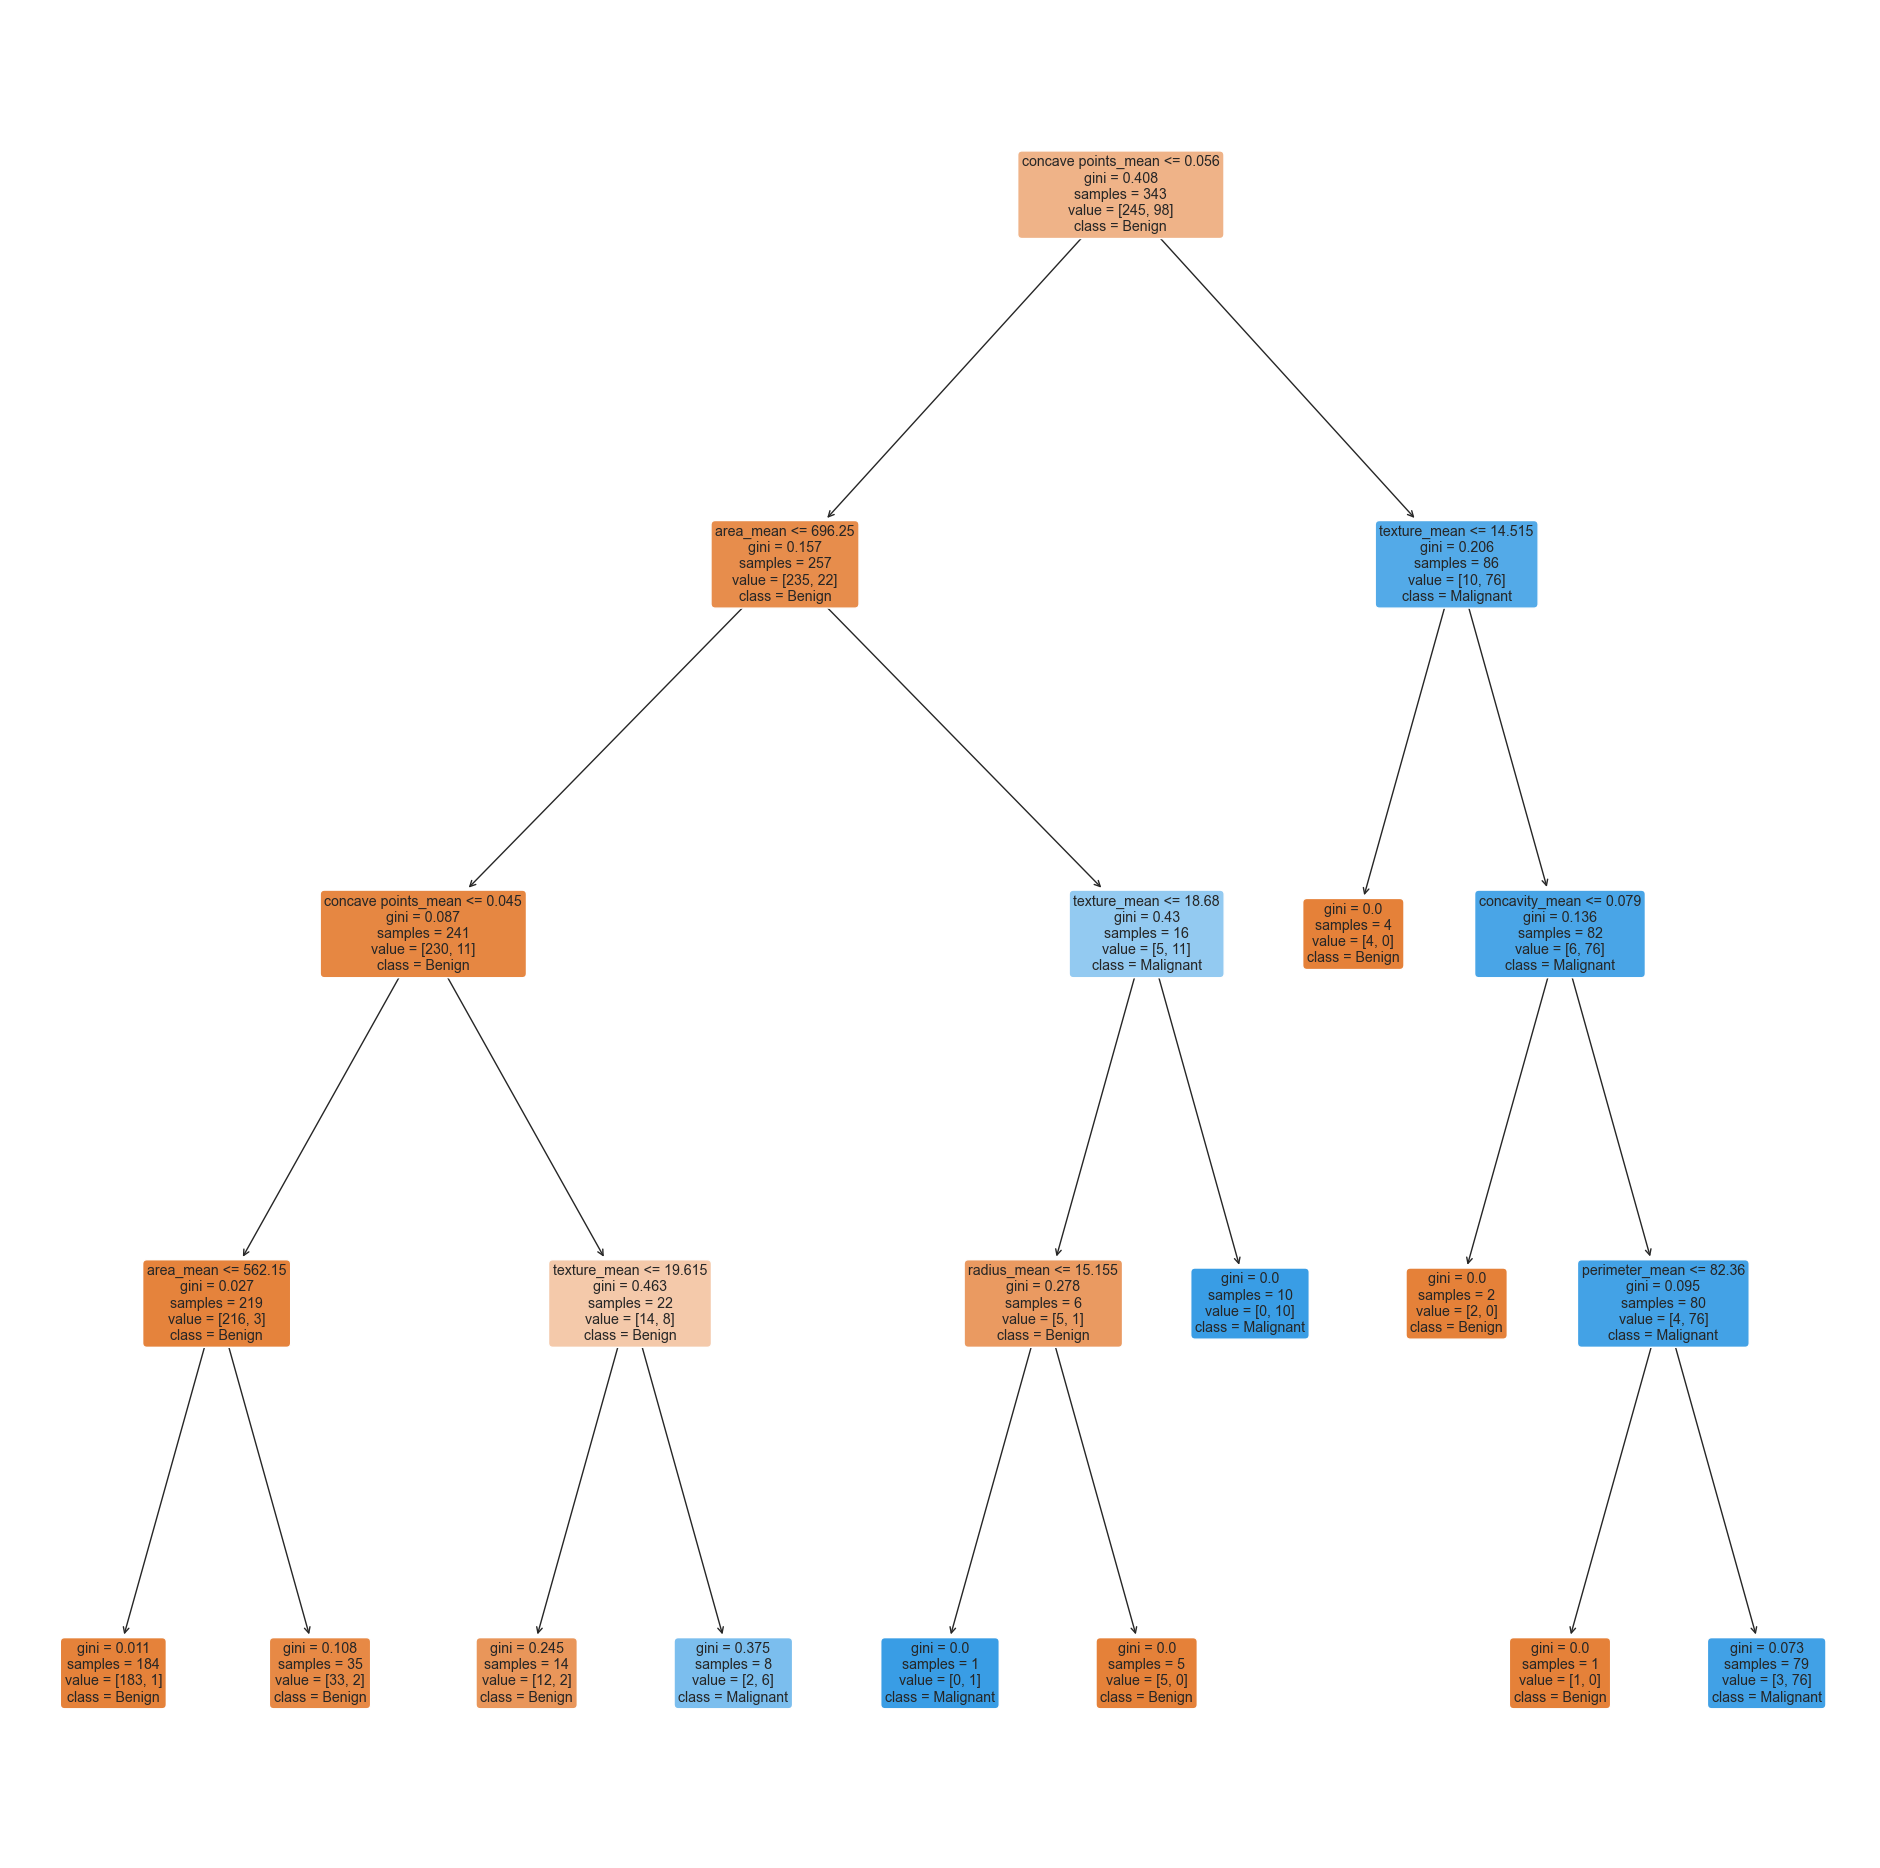

In [25]:
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Benign","Malignant"])

# `End of Machine Learning Section`

Now that we have run our dataset through the 4 models, we have our results printed above. Now, how do we make sense of these results? The next section will analyze our data-driven insights and come to a conclusion as to the best performing model.

# `Data-Driven Insights: Receiver Operator Curve` 

We decided not to simply make a judgement based on the classification accuracy alone. We used a ROC curve to make a more informed judgement that better conforms to the standards set by clinicians in clinical trials. We are after all analyzing data in the healthcare sector.

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 


`Metrics`

TPR = FPR : Random Classifier

FPR = 0, TPR = 1 : Perfect Classifier




Text(0, 0.5, 'True Positive Rate')

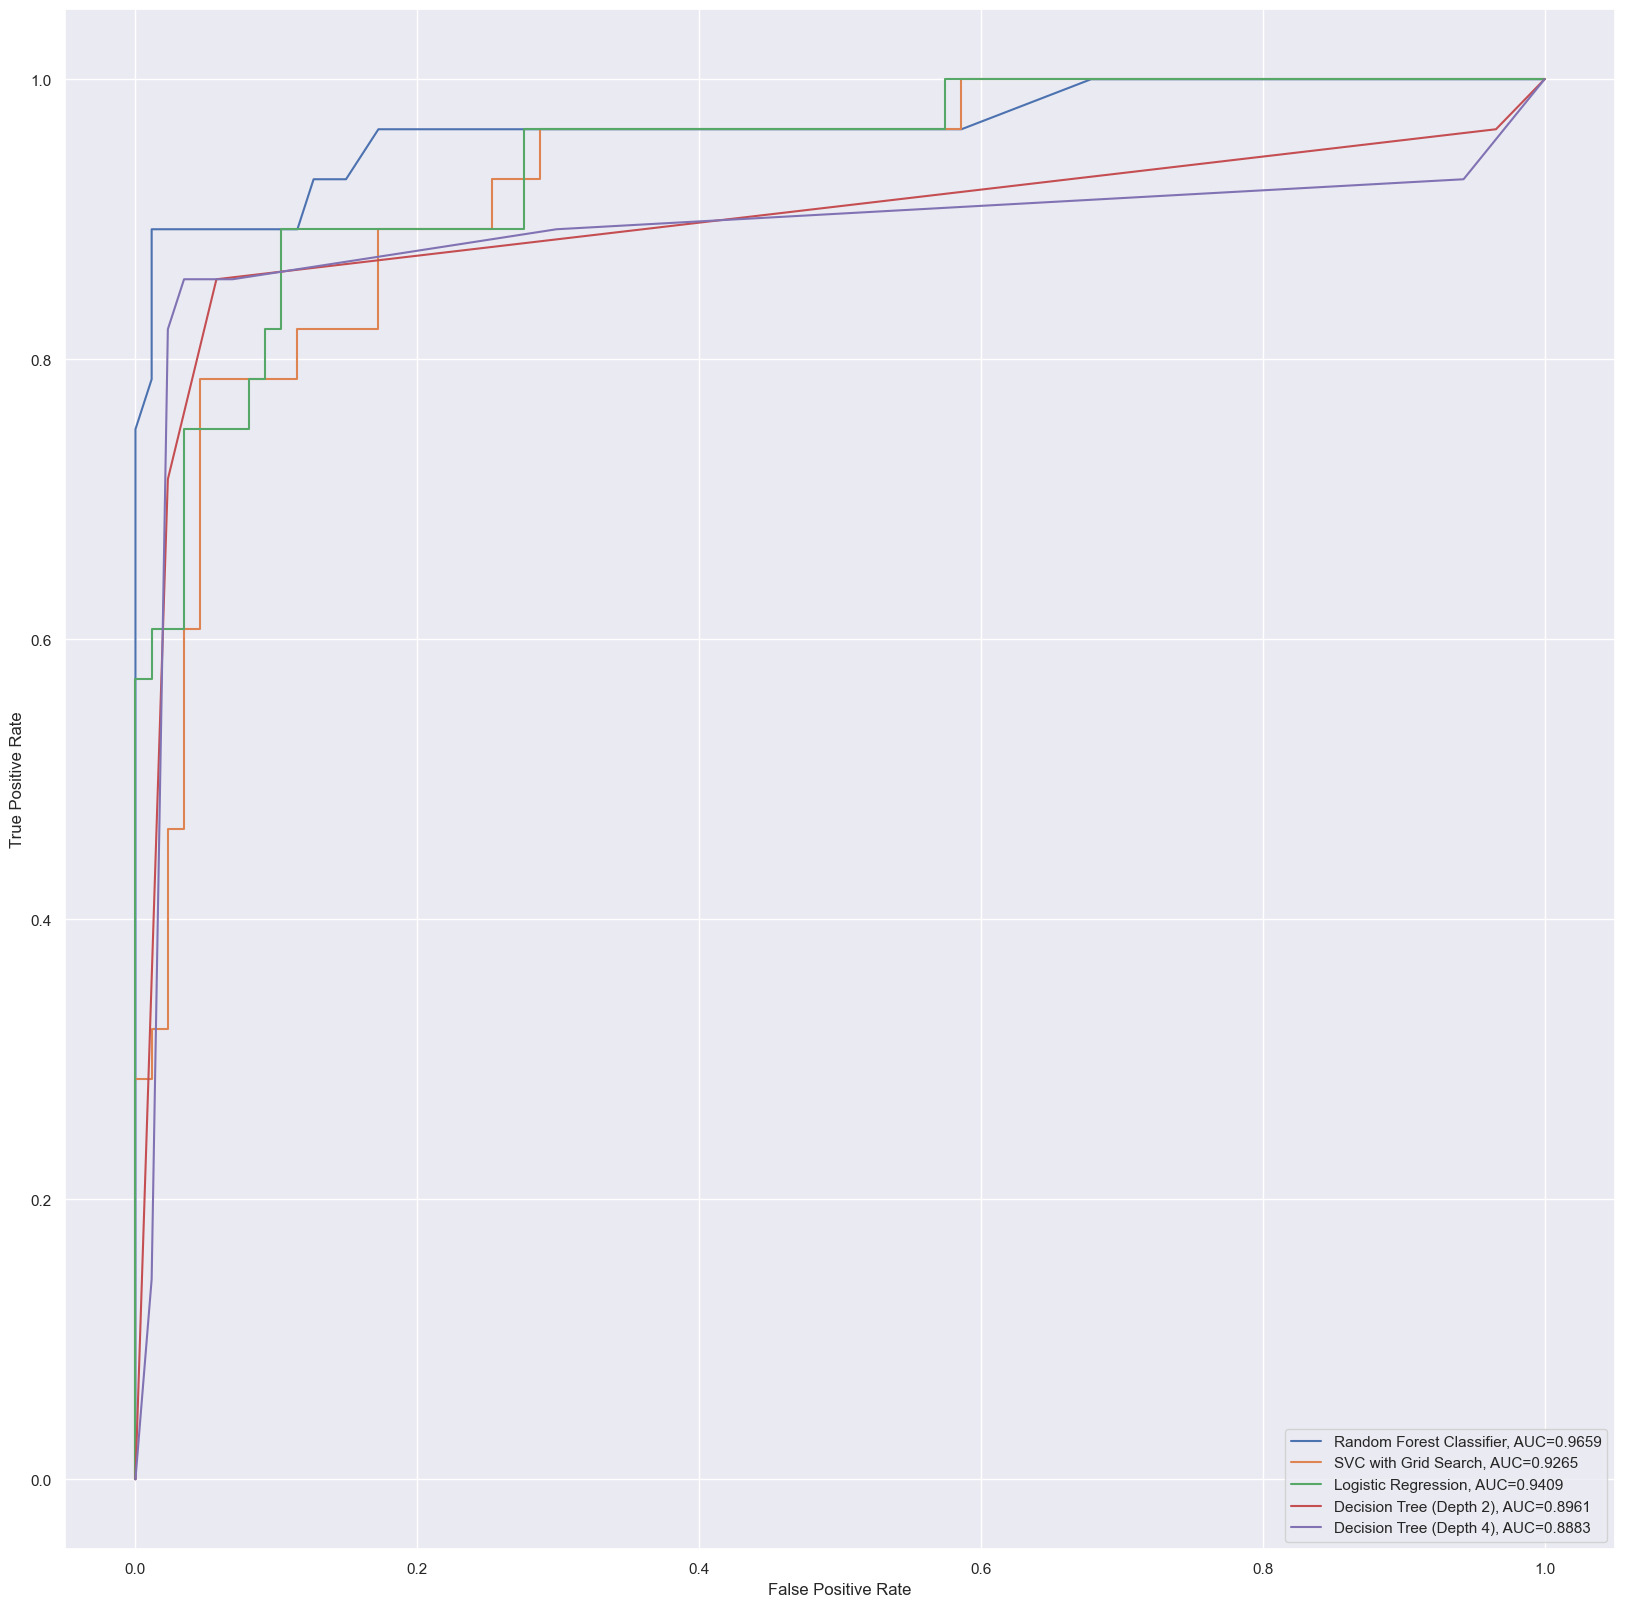

In [26]:
from sklearn import metrics

#set up plotting area
plt.figure(figsize=(20,20)).clf()


#fit random forest classifier model and plot ROC curve
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label="M")
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))

#fit svc with grid search model and plot ROC curve
model = GridSearchCV(svc, param_grid, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label="M")
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SVC with Grid Search, AUC="+str(auc))

#fit logistic regression model and plot ROC curve
model = LogisticRegression(C = 0.1)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label="M")
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit Decision Tree (depth 2) and plot ROC curve
model = DecisionTreeClassifier(max_depth = 2)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label="M")
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree (Depth 2), AUC="+str(auc))

#fit Decision Tree (depth 4) and plot ROC curve
model = DecisionTreeClassifier(max_depth = 4)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred, pos_label="M")
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree (Depth 4), AUC="+str(auc))



#add legend
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

### `Tablulated Results`

<img src="images/ROC_Results_Table.png" width="1200" height="400">

### `Graphical Representation of Results`

<img src="images/ROC_Results_Graph.png" width="1000" height="400">

From the barchart above, we see that Random Forest Classifier has a higher classification accuracy, a higher Area Under Curve (of the ROC), and a larger f-1 score than all the other models. This makes the Random Forest Classifier the best model in predicting breast cancer.



## `Further Evaluation: False Negative Rate`

In the diagnosis of breast cancer, false negatives can be a big cause of concern. It may cause patients to avoid checkups thinking that they are fine when in fact the breast cancer is malignant and requires immediate treatment.

We shall calculate the FNR (test dataset) for each of the models used to further evaluate how our chosen models have performed in the context of breast cancer prediction. 

********* FALSE NEGATIVE RATES *********

`SVC WITH GRID`: FNR = 11 / (11+17) = **0.393**

`RANDOM FOREST`: FNR = 3 / (3+25) = **0.107**

`LOGISTIC REGRESSION`: FNR = 6 / (6+22) = **0.214**

`HEIGHT 2 CLASSIFICATION TREE`: 4 / (4+24) = **0.143**

`HEIGHT 4 CLASSIFICATION TREE`: 5 / (5+23) = **0.179**

Thus, it is further confirmed that the random forest is the most suitable model for this project since it has the lowest FNR.

## `Final Verdict`: Random Forest Classifier is the best model in predicting breast cancer

### `Recommendations: How to further improve on this project?`

We see 2 main aspects that can potentially be improved upon in future iterations of this project. 

Dataset Selection
- The models can be trained on larger and more extensive datasets, to improve the robustness of the models.

Hyperparameter Tuning
- Hyperparameters of the various models can also be automatically tuned during training using informed search strategies to reduce training time.





### `Where do we go from here?`

The models used in this project were never meant to replace the work of doctors or radiologists whom work tirelessly to diagnose breast cancer cases on a daily basis.

The purpose of our work is to test if machine learning can potentially be used to augment the diagnosis process considering how taxing it is on medical professionals, coupled with the fact that current methods are not perfect. 

Ultimately, a trained medical professional will have to determine if these results obtained are consistent with their knowledge. But we have already shown that the diagnosis of breast cancer can indeed be a data-driven problem.

### `AUTHORS`

WAYNE TAN JING HENG

CHAN MING HAN